<a href="https://colab.research.google.com/github/Partha16/myDataVizProjects/blob/main/Social_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory data analysis

# Importing relevant libraries and datasets

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importing a data sheet from my drive
df = pd.read_csv('/content/drive/MyDrive/Excel Sheets/social-development.csv')

This is a data sheet containing social descriptors of different countries measured by the world bank for each year.

# Describing the data

Describing the shape of the dataset

In [ ]:
df.shape

(14418, 37)

Describing the broad information carried in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 37 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Country Name                                                                                       14418 non-null  object 
 1   Country Code                                                                                       14418 non-null  object 
 2   Year                                                                                               14418 non-null  int64  
 3   Adolescent fertility rate (births per 1,000 women ages 15-19)                                      14418 non-null  float64
 4   Children in employment, female (% of female children ages 7-14)                                    14418 non-null  flo

Head of the dataset

In [ ]:
df.head()

,Country Name,Country Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Children in employment, female (% of female children ages 7-14)","Children in employment, male (% of male children ages 7-14)","Children in employment, study and work (% of children in employment, ages 7-14)","Children in employment, study and work, female (% of female children in employment, ages 7-14)","Children in employment, study and work, male (% of male children in employment, ages 7-14)","Children in employment, total (% of children ages 7-14)","Children in employment, work only (% of children in employment, ages 7-14)","Children in employment, work only, female (% of female children in employment, ages 7-14)","Children in employment, work only, male (% of male children in employment, ages 7-14)","Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Literacy rate, youth (ages 15-24), gender parity index (GPI)","Prevalence of HIV, female (% ages 15-24)","Prevalence of HIV, male (% ages 15-24)",Proportion of seats held by women in national parliaments (%),Refugee population by country or territory of asylum,Refugee population by country or territory of origin,"School enrollment, primary (gross), gender parity index (GPI)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (gross), gender parity index (GPI)","School enrollment, tertiary (gross), gender parity index (GPI)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)"
0,Albania,ALB,1977,25.4050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.045,67.943,0.00000,0.0,0.0,0.0,0,0,0.00000,0.00000,0.00000,0.00000,0.000,0.000,0.000000,0.000000
1,Azerbaijan,AZE,2013,49.8760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.580002,34.514000,34.056000,61.323002,66.661003,67.963997,72.016998,69.292999,74.672,68.638,0.99950,0.1,0.1,16.0,1380,10814,0.96903,0.00000,0.00000,1.11285,5.946,4.037,62.134001,51.106001
2,Azerbaijan,AZE,2015,51.7000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.240002,38.389000,37.348999,62.516998,67.906998,68.681999,72.780998,70.306999,74.924,68.913,0.99956,0.1,0.1,16.9,1278,9710,0.98318,0.00000,0.00000,1.16234,5.867,4.088,64.157000,47.335001
3,Burkina Faso,BFA,1993,144.3790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.252998,83.032997,77.682999,74.650002,77.280998,90.335999,91.195000,83.906998,50.534,48.046,0.00000,3.3,2.4,0.0,6604,63,0.65419,0.00000,0.00000,0.29646,2.785,2.432,92.241001,89.190002
4,Bulgaria,BGR,1989,72.1374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.190,68.420,0.00000,0.0,0.0,0.0,0,0,0.98595,0.99031,0.99277,1.22827,0.000,0.000,0.000000,0.000000


The amount of data from each year visualized

(array([1441., 1444., 1458., 1221., 1472., 1483., 1264., 1536., 1558.,
        1541.]),
 array([1960. , 1965.7, 1971.4, 1977.1, 1982.8, 1988.5, 1994.2, 1999.9,
        2005.6, 2011.3, 2017. ]),
 <a list of 10 Patch objects>)

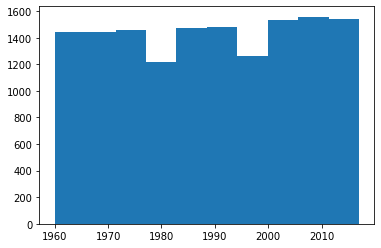

In [ ]:
plt.hist(df['Year'] )

As can be seen from the above graph the number of data elements from each year is almost the same  

In [ ]:
df[(df["Life expectancy at birth, male (years)"] > 100) | (df["Life expectancy at birth, female (years)"] > 100)]

,Country Name,Country Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Children in employment, female (% of female children ages 7-14)","Children in employment, male (% of male children ages 7-14)","Children in employment, study and work (% of children in employment, ages 7-14)","Children in employment, study and work, female (% of female children in employment, ages 7-14)","Children in employment, study and work, male (% of male children in employment, ages 7-14)","Children in employment, total (% of children ages 7-14)","Children in employment, work only (% of children in employment, ages 7-14)","Children in employment, work only, female (% of female children in employment, ages 7-14)","Children in employment, work only, male (% of male children in employment, ages 7-14)","Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Literacy rate, youth (ages 15-24), gender parity index (GPI)","Prevalence of HIV, female (% ages 15-24)","Prevalence of HIV, male (% ages 15-24)",Proportion of seats held by women in national parliaments (%),Refugee population by country or territory of asylum,Refugee population by country or territory of origin,"School enrollment, primary (gross), gender parity index (GPI)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (gross), gender parity index (GPI)","School enrollment, tertiary (gross), gender parity index (GPI)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)"
9,Chile,CHL,1960,176.985600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.112000,109.208000,0.00000,0.000000,0.000000,0.0,0,0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
12,Dominican Republic,DOM,1970,275.485200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.634000,113.694000,0.00000,0.000000,0.000000,0.0,0,0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
39,Lower middle income,LMC,1980,217.142328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.926850,109.567178,1.48842,0.000000,0.000000,0.0,0,0,1.51686,1.44088,1.26508,1.27598,0.0,0.0,0.0,0.0
56,Portugal,PRT,1990,48.594800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.223999,130.619995,119.054001,96.718002,116.040001,145.792007,164.470001,139.617996,155.000000,141.200000,0.00000,0.200000,0.400000,15.2,1734,0,1.91126,1.94164,2.01052,0.00000,0.0,0.0,0.0,0.0
76,Afghanistan,AFG,1990,325.670800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.832001,153.694000,96.421997,29.570000,30.608000,173.350006,176.923996,105.321999,101.748000,97.780000,0.00000,0.000000,0.000000,7.4,100,12678190,1.09918,0.00000,0.00000,0.95234,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14320,Thailand,THA,1980,117.246400,0.0,0.0,0.0,0.0,0.0,0.0,

As you can see from the above code that there are data elements which make no sense in terms of life expectancy, here we see that some countries have life expectancy greater than 100 at birth, which is not possible in a realistic situation so we discount that data elements while we explore the life expectancies

In [ ]:
df_le = df[(df["Life expectancy at birth, male (years)"] < 100) & (df["Life expectancy at birth, female (years)"] < 100)]

Next we try to see how the mean of life expectancy per country changes over the years

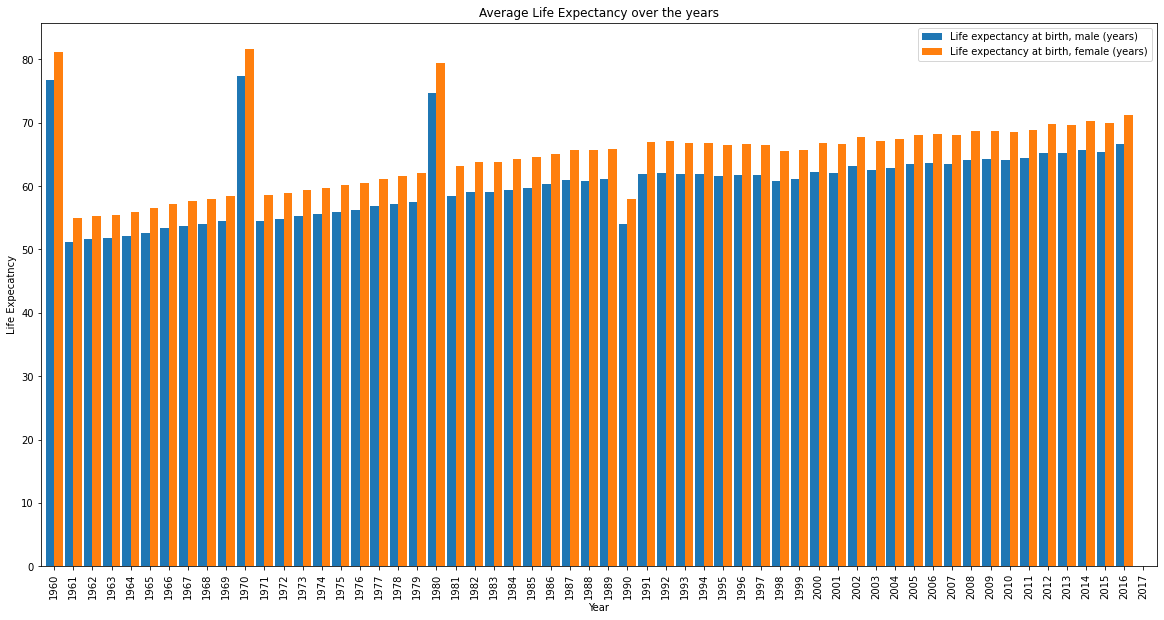

In [ ]:
df_le_yr = df_le.groupby("Year").mean()
df_le_yr[["Life expectancy at birth, male (years)","Life expectancy at birth, female (years)"]].plot(kind = 'bar', figsize = (20,10), width = 0.9, ylabel = 'Life Expecatncy', title = 'Average Life Expectancy over the years')


As you can see from the graph the trend of the life expectancy of both males and females over the years is incresing and there are some outstanding results for some years, we can safely take that these are inconsistencies in the dataset

Next we try to visualize the average adolscent fertility rates per country over the years

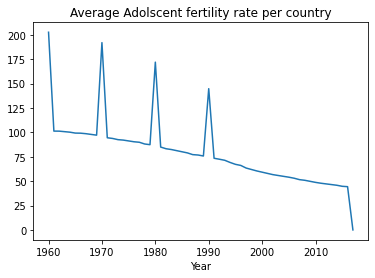

In [ ]:
df.groupby("Year")["Adolescent fertility rate (births per 1,000 women ages 15-19)"].mean().plot(title = "Average Adolscent fertility rate per country")

As you can see from the graph the rate of adolscent fertility rate is coming down over the years. This is a good thing.

Next we check school enrollemnt

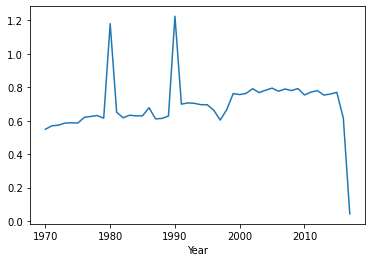

In [ ]:
df_yr = df.groupby("Year").mean()
df_yr[(df_yr["School enrollment, primary (gross), gender parity index (GPI)"] > 0)]["School enrollment, primary (gross), gender parity index (GPI)"].plot()

As you can see the primary school Enrollement is also gradually increasing per country but not in a very imapctful way. This is because there are still countries where there are little to no infrastructure for any kind of education

# Expolring a single country's data

In this section we take out a single countries data and see how it has changed and explore the relationships between them. we would take our country to explore as India.

In [ ]:
df_in = df[df["Country Code"] == 'IND']
df_in = df_in.sort_values("Year")
df_in

,Country Name,Country Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Children in employment, female (% of female children ages 7-14)","Children in employment, male (% of male children ages 7-14)","Children in employment, study and work (% of children in employment, ages 7-14)","Children in employment, study and work, female (% of female children in employment, ages 7-14)","Children in employment, study and work, male (% of male children in employment, ages 7-14)","Children in employment, total (% of children ages 7-14)","Children in employment, work only (% of children in employment, ages 7-14)","Children in employment, work only, female (% of female children in employment, ages 7-14)","Children in employment, work only, male (% of male children in employment, ages 7-14)","Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Literacy rate, youth (ages 15-24), gender parity index (GPI)","Prevalence of HIV, female (% ages 15-24)","Prevalence of HIV, male (% ages 15-24)",Proportion of seats held by women in national parliaments (%),Refugee population by country or territory of asylum,Refugee population by country or territory of origin,"School enrollment, primary (gross), gender parity index (GPI)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (gross), gender parity index (GPI)","School enrollment, tertiary (gross), gender parity index (GPI)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)"
13085,India,IND,1960,207.8420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.826,83.780,0.00000,0.0,0.0,0.0,0,0,0.00000,0.00000,0.00000,0.00000,0.000,0.000,0.000000,0.000000
9247,India,IND,1961,104.0930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.032,42.510,0.00000,0.0,0.0,0.0,0,0,0.00000,0.00000,0.00000,0.00000,0.000,0.000,0.000000,0.000000
6945,India,IND,1962,104.2650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.663,43.134,0.00000,0.0,0.0,0.0,0,0,0.00000,0.00000,0.00000,0.00000,0.000,0.000,0.000000,0.000000
5029,India,IND,1963,104.7644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.307,43.762,0.00000,0.0,0.0,0.0,0,0,0.00000,0.00000,0.00000,0.00000,0.000,0.000,0.000000,0.000000
1779,India,IND,1964,105.2638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.964,44.395,0.00000,0.0,0.0,0.0,0,0,0.00000,0.00000,0.00000,0.00000,0.000,0.000,0.000000,0.000000
12711,India,IND,1965,105.7632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.635,45.034,0.00000,0.0,0.0,0.0,0,0,0.00000,0.00000,0.00000,0.00000,0.000,0.000,0.000000,0.000000
3422,India,IND,1966,106.2626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

As you can see from the table there are holes in the dataset we would try to not use those data for visualizing

In [ ]:
df_in.describe()

,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Children in employment, female (% of female children ages 7-14)","Children in employment, male (% of male children ages 7-14)","Children in employment, study and work (% of children in employment, ages 7-14)","Children in employment, study and work, female (% of female children in employment, ages 7-14)","Children in employment, study and work, male (% of male children in employment, ages 7-14)","Children in employment, total (% of children ages 7-14)","Children in employment, work only (% of children in employment, ages 7-14)","Children in employment, work only, female (% of female children in employment, ages 7-14)","Children in employment, work only, male (% of male children in employment, ages 7-14)","Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Literacy rate, youth (ages 15-24), gender parity index (GPI)","Prevalence of HIV, female (% ages 15-24)","Prevalence of HIV, male (% ages 15-24)",Proportion of seats held by women in national parliaments (%),Refugee population by country or territory of asylum,Refugee population by country or territory of origin,"School enrollment, primary (gross), gender parity index (GPI)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (gross), gender parity index (GPI)","School enrollment, tertiary (gross), gender parity index (GPI)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)"
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,1988.500000,89.933755,0.450000,0.544828,2.458621,0.484483,0.474138,0.498276,6.163793,2.963793,2.974138,12.317948,30.545207,21.817759,16.333190,17.179534,41.084897,42.317552,30.202138,59.300690,58.759103,0.066104,0.068966,0.089655,3.689655,94379.448276,5042.172414,0.629215,0.491085,0.470919,0.375480,2.003483,1.742759,40.937707,37.775414
std,16.886879,45.034966,1.921645,2.452079,10.141820,2.674887,2.621541,2.190529,21.153920,15.834658,15.889824,14.105115,33.768146,24.308706,17.914323,18.828048,44.383971,45.681731,32.698374,16.196843,15.714354,0.219569,0.084203,0.119487,4.844084,108516.133143,6825.942529,0.412376,0.412781,0.368770,0.339430,2.175799,1.901661,44.319514,40.875267
min,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1974.250000,57.819000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

Here we try to analyse the prevalance of HIV in the country in both males and females since the start of the epidemic in the country

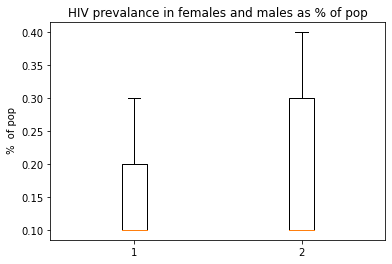

In [ ]:
plt.boxplot([df_in[df_in['Year'] > 1990]['Prevalence of HIV, female (% ages 15-24)'], df_in[df_in['Year'] > 1990]['Prevalence of HIV, male (% ages 15-24)']])
plt.title( label = "HIV prevalance in females and males as % of pop")
plt.ylabel(ylabel= " %  of pop")
plt.show()

As we can see the number of HIV patients as % of pop never exceded 0.4% and is averaged around 0.1% of the population. A good sign for the well being of the country.

Next we try to see if there is a relationship between School enrollment, primary (gross), gender parity index (GPI) and Adolscent fertility rate. The obvious speculation will be that higher primary school enrollemnt will decrease adolscent fertility rate. A scatterplot will be used to determine the realtionship.

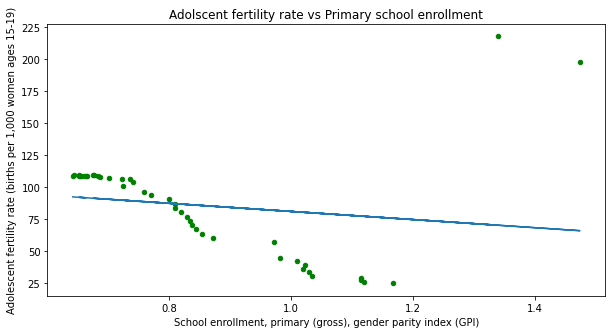

In [ ]:
df_in_n = df_in[df_in['School enrollment, primary (gross), gender parity index (GPI)'] > 0]
df_in_n.plot(x = 'School enrollment, primary (gross), gender parity index (GPI)', y = 'Adolescent fertility rate (births per 1,000 women ages 15-19)', kind = 'scatter' , title = 'Adolscent fertility rate vs Primary school enrollment', figsize = (10,5) , color = 'g')
m, b = np.polyfit(df_in_n['School enrollment, primary (gross), gender parity index (GPI)'], df_in_n['Adolescent fertility rate (births per 1,000 women ages 15-19)'],1)
plt.plot(df_in_n['School enrollment, primary (gross), gender parity index (GPI)'], m*df_in_n['School enrollment, primary (gross), gender parity index (GPI)'] + b)
plt.show()

As you can see from the graph there is a very strong negative correlation between school enrollemnt and Adolscent fertility rate, thus higher school enrollemnt should be encouraged.

Next we analyse the relationship b/w the number of women in national parliment and how it affects values showing women's welfare

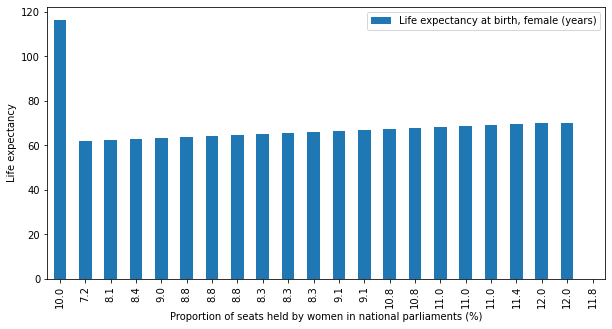

In [ ]:
df_in[df_in["Proportion of seats held by women in national parliaments (%)"] > 0].plot(x = 'Proportion of seats held by women in national parliaments (%)', y = 'Life expectancy at birth, female (years)' , kind ='bar', ylabel = 'Life expectancy', figsize = (10,5))

You can see a slight correlation if you ignore the outliers

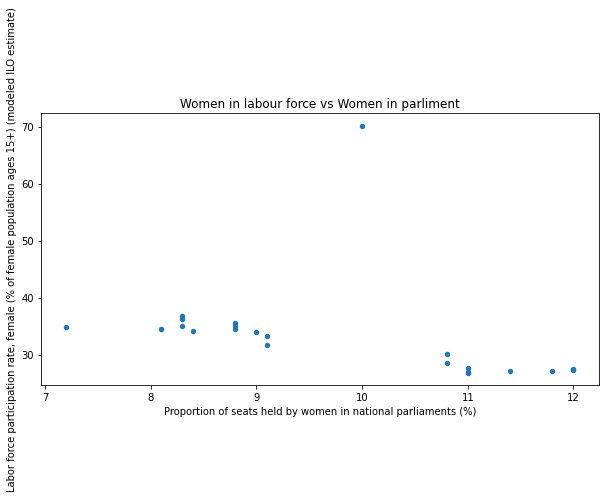

In [ ]:
df_in[df_in["Proportion of seats held by women in national parliaments (%)"] > 0].plot(x = "Proportion of seats held by women in national parliaments (%)" , y = "Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)", kind ='scatter', title = 'Women in labour force vs Women in parliment', figsize = (10,5))

As you can see from the graph above the number of women in national parliments doesnt correlate to higher women in labour force in fact it shrinks.

There is a popular idea that is going around stating that the refugees that are taken in by the country increase the vulnearble employment of the people living in the country. The following graph is to check the validity of the statement.

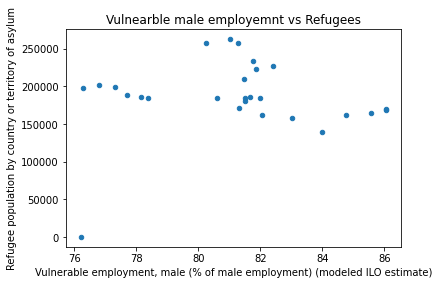

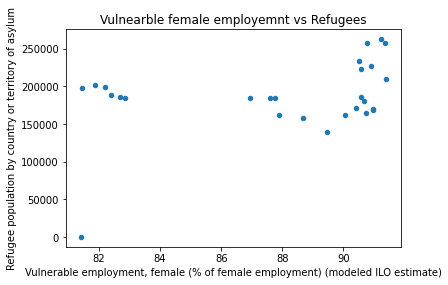

In [ ]:
df_in[df_in["Year"] > 1990].plot(y = "Refugee population by country or territory of asylum" , x = "Vulnerable employment, male (% of male employment) (modeled ILO estimate)" , kind = "scatter" ,title = "Vulnearble male employemnt vs Refugees")
df_in[df_in["Year"] > 1990].plot(y = "Refugee population by country or territory of asylum" , x = "Vulnerable employment, female (% of female employment) (modeled ILO estimate)" , kind = "scatter", title = "Vulnearble female employemnt vs Refugees")

There is no correlation to high vulnearable jobs and the increase in refugees.

Next we see how the life expectancy of the country has changed over the years

Text(0.5, 1.0, 'Life Expectancy over years')

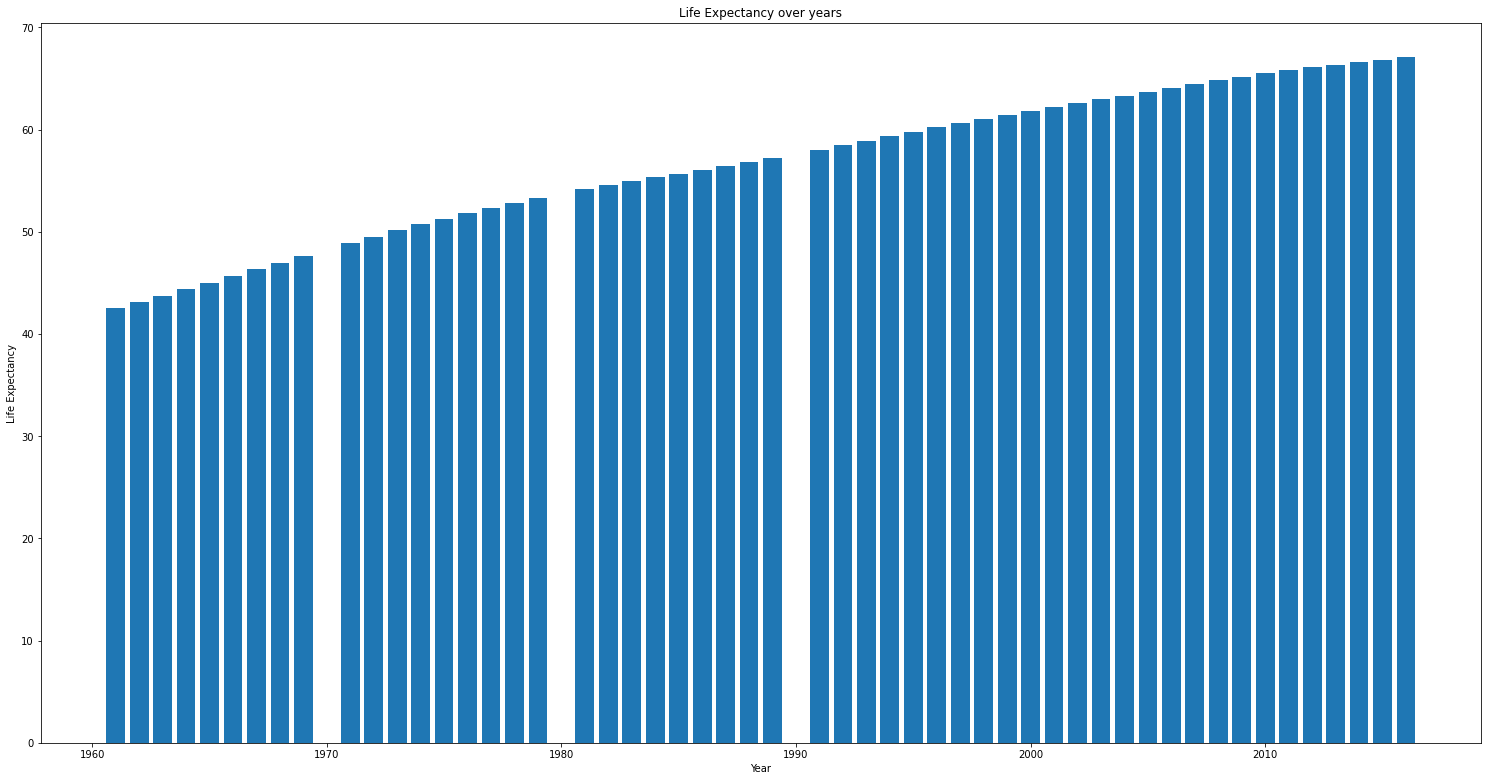

In [ ]:
df_in_le = df_in[(df_in["Life expectancy at birth, male (years)"] < 80) & (df_in["Life expectancy at birth, female (years)"] < 80)]
df_in_le = df_in_le[df_in_le["Life expectancy at birth, male (years)"] > 0]
width = 0.10
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_in_le["Year"],df_in_le["Life expectancy at birth, male (years)"])
plt.xlabel(xlabel="Year")
plt.ylabel(ylabel="Life Expectancy")
plt.title(label="Life Expectancy over years")


Text(0.5, 1.0, 'Life Expectancy over years(female)')

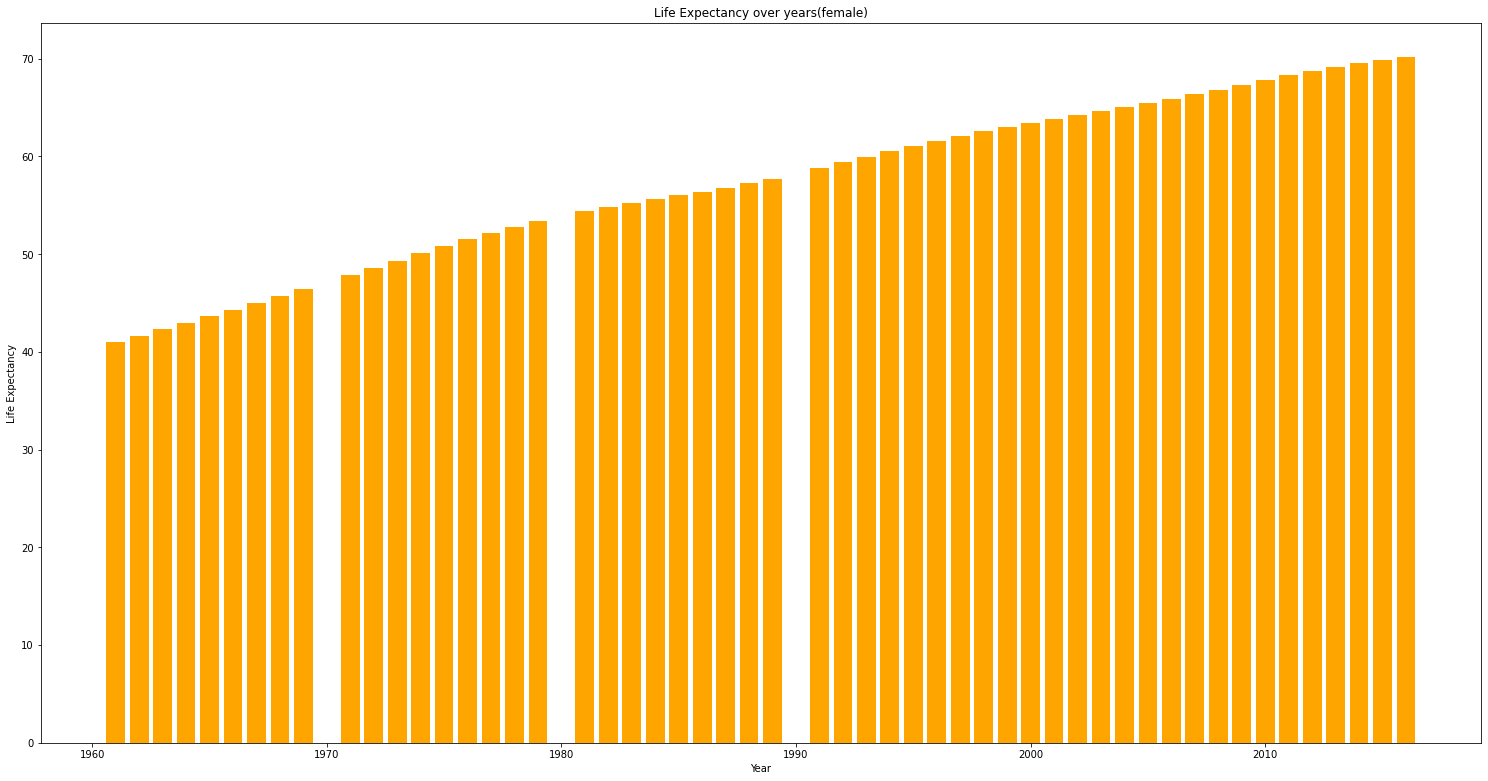

In [ ]:
width = 0.35
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_in_le["Year"],df_in_le["Life expectancy at birth, female (years)"], color = 'orange')
plt.xlabel(xlabel="Year")
plt.ylabel(ylabel="Life Expectancy")
plt.title(label="Life Expectancy over years(female)")

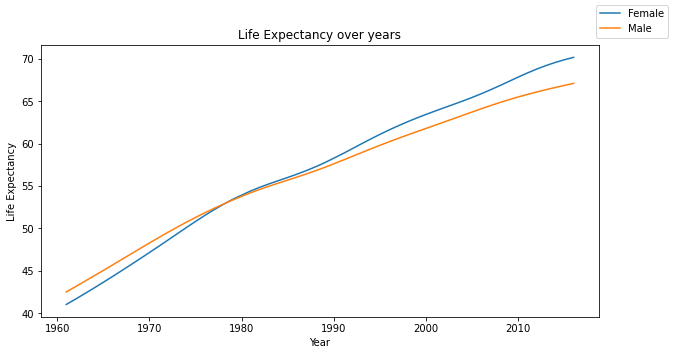

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(df_in_le["Year"], df_in_le["Life expectancy at birth, female (years)"])
plt.plot(df_in_le["Year"], df_in_le["Life expectancy at birth, male (years)"])
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy over years')
fig.legend(labels = ('Female' , 'Male'))